# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [328]:
# Read in the customer data
import numpy as np
import pandas as pd
df_customers = pd.read_csv('../Data/maven_music_customers.csv')
print(df_customers.info())
df_customers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer ID        30 non-null     int64 
 1   Customer Name      30 non-null     object
 2   Email              30 non-null     object
 3   Member Since       30 non-null     object
 4   Subscription Plan  25 non-null     object
 5   Subscription Rate  30 non-null     object
 6   Discount?          7 non-null      object
 7   Cancellation Date  13 non-null     object
dtypes: int64(1), object(7)
memory usage: 2.0+ KB
None


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [329]:
# Read in the listening history
df_history = pd.read_excel('../Data/maven_music_listening_history.xlsx')
print(df_history.info())
df_history.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB
None


,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [330]:
# Hint: Where might you find listening history data beyond the ID's?

In [331]:
# Read in the audio data
df_audio = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=1)
print(df_audio.info())
df_audio.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     object
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 672.0+ bytes
None


,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [332]:
# Read in the session data
df_sessions = pd.read_excel('../Data/maven_music_listening_history.xlsx', sheet_name=2)
print(df_sessions.info())
df_sessions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB
None


,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data
### (I Cleaned each dataframe thoroughly before going to the next)

### a. Customers Dataframe

In [333]:
# Check the data types
df_customers.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [334]:
# Customer Dataframe
df_customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [335]:
df_customers['Email'] = df_customers['Email'].apply(lambda x: str(str(x).split(':')[1].strip()).lower())
df_customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [336]:
df_customers['Member Since'] = pd.to_datetime(df_customers['Member Since'], format='%m/%d/%y', errors='coerce')
df_customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,NaN,$2.99,NaN,NaN


In [337]:
df_customers['Cancellation Date'] = pd.to_datetime(df_customers['Cancellation Date'], format='%m/%d/%y', errors='coerce')
df_customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),$2.99,NaN,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,NaN,$2.99,NaN,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,NaN,$2.99,NaN,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),$2.99,NaN,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,NaN,$2.99,NaN,NaT


In [338]:
# Remove the ' (Ads)' text from the 'Basic' category in the Subscription Plan column
df_customers['Subscription Plan'] = df_customers['Subscription Plan'].str.split(' ').str[0]
df_customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,$2.99,NaN,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,NaN,$2.99,NaN,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,NaN,$2.99,NaN,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic,$2.99,NaN,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,NaN,$2.99,NaN,NaT


In [339]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  25 non-null     object        
 5   Subscription Rate  30 non-null     object        
 6   Discount?          7 non-null      object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(5)
memory usage: 2.0+ KB


In [340]:
# Remove the dollar sign and convert the subscription Rate to a float
df_customers['Subscription Rate'] = df_customers['Subscription Rate'].str.replace('$', '').astype(float)
print(df_customers['Subscription Plan'].value_counts())
print(df_customers['Subscription Plan'].isna().sum()) # 5
print(df_customers['Subscription Rate'].isna().sum()) # 0

Subscription Plan
Premium    13
Basic      12
Name: count, dtype: int64
5
0


In [341]:
# If the subscription rate is 2.99, set the subscription plan to 'Basic'
df_customers['Subscription Plan'] = np.where(df_customers['Subscription Rate'] == 2.99, 'Basic', df_customers['Subscription Plan'])
print(df_customers['Subscription Plan'].value_counts())

Subscription Plan
Basic      17
Premium    13
Name: count, dtype: int64


In [342]:
# If the customer has a discount, set the subscription rate to 7.99 (Assuming that the are is only one kind of discount)
df_customers['Subscription Rate'] = np.where(df_customers['Discount?'] == 'Yes', 7.99, df_customers['Subscription Rate'])
print(df_customers['Subscription Rate'].value_counts())

Subscription Rate
2.99     17
7.99      7
9.99      5
99.99     1
Name: count, dtype: int64


In [343]:
# Fix typo 99.99 rate
df_customers['Subscription Rate'] = np.where(df_customers['Subscription Rate'] == 99.99, 9.99, df_customers['Subscription Rate'])

In [344]:
# Fill missing values in Discount? column with 'No'
df_customers['Discount?'].fillna('No', inplace=True)
print(df_customers['Discount?'].value_counts())
df_customers.head()

Discount?
No     23
Yes     7
Name: count, dtype: int64


,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic,2.99,No,NaT
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic,2.99,No,2023-06-01
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic,2.99,No,NaT
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic,2.99,No,NaT


- I will probably need to convert it to numeric 0 or 1 for modelling.

In [345]:
df_customers.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     0
Subscription Rate     0
Discount?             0
Cancellation Date    17
dtype: int64

- We assume that the missing values in the 'Cancellation Date' column are due to the fact that the customer is still subscribed, so we keep the columns as they are.

In [346]:
df_customers.duplicated().sum()

0

In [347]:
# Look for outliers
df_customers.describe()

,Customer ID,Member Since,Subscription Rate,Cancellation Date
count,30.000000,30,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,5.556667,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,9.990000,2023-06-03 00:00:00
std,814.255587,NaN,3.058998,NaN


- Nothing out of the ordinary

In [348]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  30 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          30 non-null     object        
 7   Cancellation Date  13 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 2.0+ KB


### b. History Dataframe

In [349]:
# Check the data types
df_history.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [350]:
# Listening History Dataframe
df_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [351]:
df_history.isna().sum()

Customer ID    0
Session ID     0
Audio Order    0
Audio ID       0
Audio Type     0
dtype: int64

In [352]:
df_history.duplicated().sum()

0

In [353]:
# Look for outliers
df_history.describe()

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


- Nothing out of the ordinary

In [354]:
df_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
dtypes: int64(4), object(1)
memory usage: 19.9+ KB


### c. Audio Dataframe

In [355]:
# Check the data types
df_audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [356]:
# Audio Dataframe
df_audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [357]:
df_audio['ID'] = df_audio['ID'].apply(lambda x: pd.to_numeric(x.split('-')[1]))
df_audio.head()

,ID,Name,Genre,Popularity
0,101,Dance All Night,Pop,1
1,102,Unbreakable Beat,Pop,2
2,103,Sunset Boulevard,Pop Music,5
3,104,Glowing Hearts,Pop Music,10
4,105,Pop Rocks,Pop Music,52


In [358]:
df_audio['Genre'] = df_audio['Genre'].apply(lambda x: str(str(x).split('Music')[0]).strip())
df_audio.head()

,ID,Name,Genre,Popularity
0,101,Dance All Night,Pop,1
1,102,Unbreakable Beat,Pop,2
2,103,Sunset Boulevard,Pop,5
3,104,Glowing Hearts,Pop,10
4,105,Pop Rocks,Pop,52


In [359]:
df_audio['Genre'].unique()

array(['Pop', 'Country', 'Hip Hop', 'Jazz', 'Comedy', 'True Crime'],
      dtype=object)

- Genres look normal (I guess True Crime is a genre only for Podcasts)

In [360]:
df_audio[df_audio['Genre'] == 'True Crime'] # Looks ok

,ID,Name,Genre,Popularity
15,204,Crime Chronicles,True Crime,4
16,205,Investigating Darkness,True Crime,17


In [361]:
df_audio[ (df_audio['Popularity'] <= 0) | (df_audio['Popularity'] >= 100)] # No invalid values in the Popularity column

,ID,Name,Genre,Popularity


In [362]:
df_audio.isna().sum()

ID            0
Name          0
Genre         0
Popularity    0
dtype: int64

In [363]:
df_audio.duplicated().sum()

0

In [364]:
# Look for outliers
df_audio.describe()

,ID,Popularity
count,17.000000,17.000000
mean,134.882353,21.058824
std,45.428353,23.381271
min,101.000000,1.000000
25%,105.000000,4.000000
50%,109.000000,10.000000
75%,201.000000,28.000000
max,205.000000,80.000000


- Nothing out of the ordinary

In [365]:
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17 non-null     int64 
 1   Name        17 non-null     object
 2   Genre       17 non-null     object
 3   Popularity  17 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 672.0+ bytes


### d. Sessions Dataframe

In [366]:
# Check the data types
df_sessions.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [367]:
# Session Dataframe
df_sessions.head()


,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


In [368]:
df_sessions.isna().sum()

Session ID             0
Session Log In Time    0
dtype: int64

In [369]:
df_sessions.duplicated().sum()

0

In [370]:
# Look for outliers
df_sessions.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


- Nothing out of the ordinary

In [371]:
df_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Session ID           90 non-null     int64         
 1   Session Log In Time  90 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.5 KB


### e. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses [DID THIS DURING THE CLEANING PHASE]

In [372]:
# Create a 'Cancelled' column
df_customers['Cancelled'] = np.where(df_customers['Cancellation Date'].isna(), 'No', 'Yes')
df_customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,No
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic,2.99,No,NaT,No
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic,2.99,No,2023-06-01,Yes
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic,2.99,No,NaT,No
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic,2.99,No,NaT,No


- I will follow the same pattern as I did with the `Discount?` column, buw will convert it later to binary.

In [373]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer ID        30 non-null     int64         
 1   Customer Name      30 non-null     object        
 2   Email              30 non-null     object        
 3   Member Since       30 non-null     datetime64[ns]
 4   Subscription Plan  30 non-null     object        
 5   Subscription Rate  30 non-null     float64       
 6   Discount?          30 non-null     object        
 7   Cancellation Date  13 non-null     datetime64[ns]
 8   Cancelled          30 non-null     object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 2.2+ KB


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [374]:
# View the customers who cancelled
df_customers[df_customers['Cancellation Date'].notna()].head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic,2.99,No,2023-06-01,Yes
5,5404,Jazz Saxton,jazzy.sax@email.com,2023-03-20,Basic,2.99,No,2023-06-03,Yes
7,5759,Carol Kingbird,songbird.carol@email.com,2023-03-22,Premium,9.99,No,2023-06-02,Yes
12,6029,Chord Campbell,campbell.chordify@email.com,2023-03-29,Premium,9.99,No,2023-06-02,Yes
13,6092,Benny Beat,rhythmic.benny@email.com,2023-04-01,Basic,2.99,No,2023-06-01,Yes


In [375]:
# How long were customers members before they cancelled?
df_customers['Member Length'] = np.where(df_customers['Cancelled'] == 'Yes', df_customers['Cancellation Date'] - df_customers['Member Since'], pd.to_datetime('today') - df_customers['Member Since'])

## About 1.5 months... but that might just because we have 3 months of data (FROM SOLUTIONS)
(df_customers['Cancellation Date'] - df_customers['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [376]:
# Keep only the days for the 'Member Length' column
df_customers['Member Length'] = df_customers['Member Length'].dt.days
df_customers.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled,Member Length
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic,2.99,No,NaT,No,354
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic,2.99,No,NaT,No,354
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic,2.99,No,2023-06-01,Yes,80
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic,2.99,No,NaT,No,347
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic,2.99,No,NaT,No,347


In [377]:
# Cancellation rate for those who had a discount
cancellationRate_with_Discount = df_customers[df_customers['Discount?'] == 'Yes']['Cancelled'].value_counts(normalize=True)
cancellationRate_with_Discount

Cancelled
Yes    0.857143
No     0.142857
Name: proportion, dtype: float64

- About 86% of customers who had a discount cancelled their subscription

In [378]:
# Cancellation rate for those who did not have a discount
cancellationRate_without_Discount = df_customers[df_customers['Discount?'] == 'No']['Cancelled'].value_counts(normalize=True) 
cancellationRate_without_Discount

Cancelled
No     0.695652
Yes    0.304348
Name: proportion, dtype: float64

- Almost 70% of customers who didn't have a discount cancelled their subscription

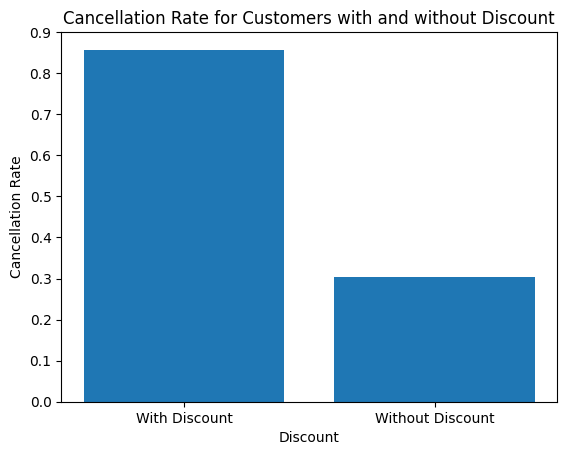

In [379]:
# Visualize the cancellation rate for those with a discount vs those without a discount
import matplotlib.pyplot as plt

# Bar plot
plt.bar(['With Discount', 'Without Discount'], [cancellationRate_with_Discount['Yes'], cancellationRate_without_Discount['Yes']])
# # Percentage of customers who did not have a discount and cancelled VS those who had a discount and cancelled
plt.xlabel('Discount')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate for Customers with and without Discount')
plt.show()

- The data shows us that customers that subscribe to the platform with a discount are almost thrice more likely to cancel their subscription.
    - One possible interpretation for this might be that people that subscribe with a discount do so mostly to try out the platform in full, but are not really interested in what it has to offer, just curious. (Educated Guess, even though I lack the necessary domain expertise. Just food for thought!)

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

In [380]:
df_audio.rename(columns={'ID': 'Audio ID'}, inplace=True) # Rename the ID column to Audio ID in the audio dataframe
df_audio.head()

,Audio ID,Name,Genre,Popularity
0,101,Dance All Night,Pop,1
1,102,Unbreakable Beat,Pop,2
2,103,Sunset Boulevard,Pop,5
3,104,Glowing Hearts,Pop,10
4,105,Pop Rocks,Pop,52


In [381]:
df_audio_history = df_history.merge(df_audio, on='Audio ID', how='left') # Merge the listening history and audio dataframes on the Audio ID column
df_audio_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,Name,Genre,Popularity
0,5001,100520,1,101,Song,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Pop Rocks,Pop,52


In [382]:
df_audio_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  505 non-null    int64 
 1   Session ID   505 non-null    int64 
 2   Audio Order  505 non-null    int64 
 3   Audio ID     505 non-null    int64 
 4   Audio Type   505 non-null    object
 5   Name         505 non-null    object
 6   Genre        505 non-null    object
 7   Popularity   505 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 31.7+ KB


<Axes: ylabel='Frequency'>

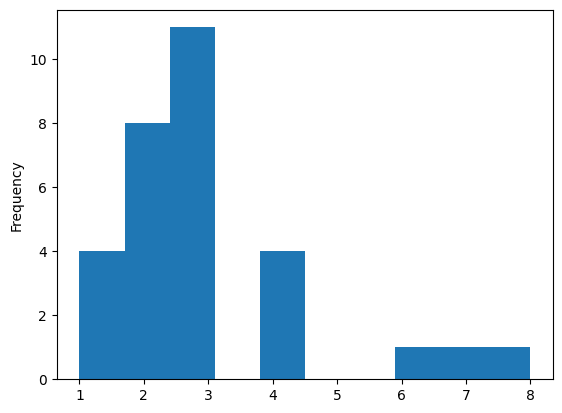

In [383]:
# Plot the number of each sessions per customer in the past 3 months (the timeframe of the data)
df_audio_history.groupby('Customer ID')['Session ID'].nunique().plot.hist()

In [384]:
# The most popular genres that customers listened to
df_audio_history['Genre'].value_counts()

Genre
Pop           267
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [385]:
# Create a dataframe ready for modeling
df_model = df_customers[['Customer ID', 'Discount?', 'Cancelled']]
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  30 non-null     int64 
 1   Discount?    30 non-null     object
 2   Cancelled    30 non-null     object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


In [386]:
df_model.head()

,Customer ID,Discount?,Cancelled
0,5001,No,No
1,5002,No,No
2,5004,No,Yes
3,5267,No,No
4,5338,No,No


In [387]:
# Convert the 'Cancelled' and 'Discount?' columns to numeric
df_model.loc[:, 'Cancelled'] = np.where(df_model['Cancelled'] == 'Yes', 1, 0)
df_model.loc[:, 'Discount?'] = np.where(df_model['Discount?'] == 'Yes', 1, 0)
df_model.head()

,Customer ID,Discount?,Cancelled
0,5001,0,0
1,5002,0,0
2,5004,0,1
3,5267,0,0
4,5338,0,0


In [388]:
# Calculate the number of listening sessions for each customer
sessionsCount = df_audio_history.groupby('Customer ID')['Session ID'].nunique().reset_index() # The number of listening sessions that each customer had
sessionsCount.head()

,Customer ID,Session ID
0,5001,8
1,5002,4
2,5004,1
3,5267,7
4,5338,4


In [389]:
df_model = df_model.merge(sessionsCount, on='Customer ID', how='left') # Merge the sessionsCount dataframe with the df_model dataframe
df_model.rename(columns={'Session ID': 'SessionCount'}, inplace=True)
df_model.head()

,Customer ID,Discount?,Cancelled,SessionCount
0,5001,0,0,8
1,5002,0,0,4
2,5004,0,1,1
3,5267,0,0,7
4,5338,0,0,4


In [390]:
# Calculate dummy variables for each genre
pd.get_dummies(df_audio_history.Genre)

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False
...,...,...,...,...,...,...
500,False,False,False,True,False,False
501,True,False,False,False,False,False
502,False,False,True,False,False,False
503,False,False,True,False,False,False


In [391]:
# Merge the dummy variables with the df_model dataframe
pd.concat([df_audio_history['Customer ID'], pd.get_dummies(df_audio_history['Genre'])], axis=1)

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,False,False,False,False,True,False
1,5001,False,False,False,False,True,False
2,5001,False,False,False,False,True,False
3,5001,False,False,False,False,True,False
4,5001,False,False,False,False,True,False
...,...,...,...,...,...,...,...
500,7579,False,False,False,True,False,False
501,6588,True,False,False,False,False,False
502,5763,False,False,True,False,False,False
503,5763,False,False,True,False,False,False


In [392]:
genres = pd.concat([df_audio_history['Customer ID'], pd.get_dummies(df_audio_history['Genre'])], axis=1).groupby('Customer ID').sum().reset_index()
genres.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,26,0,34,0
1,5002,0,22,0,0,0,0
2,5004,0,0,0,0,9,0
3,5267,0,0,22,0,23,0
4,5338,0,18,0,0,0,0


In [393]:
df_history.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [394]:
# Add a column for total songs / podcasts listened to
total_audio = df_history.groupby('Customer ID')['Audio ID'].count().rename('Total Audio').to_frame().reset_index()
total_audio.head()

,Customer ID,Total Audio
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [395]:
# Create a master audio table to calculate percentages
df_audio = genres.merge(total_audio, how='left', on='Customer ID')
df_audio

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Audio
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18
5,5404,0,0,0,0,8,0,8
6,5581,0,0,0,0,0,5,5
7,5759,0,0,0,0,15,0,15
8,5761,0,0,0,0,0,5,5
9,5763,0,0,11,0,20,0,31


In [396]:
# Percent of listening history consisting of Pop
df_model['Percent Pop'] = df_audio['Pop'] / df_audio['Total Audio']*100
df_model.head()

,Customer ID,Discount?,Cancelled,SessionCount,Percent Pop
0,5001,0,0,8,56.666667
1,5002,0,0,4,0.000000
2,5004,0,1,1,100.000000
3,5267,0,0,7,51.111111
4,5338,0,0,4,0.000000


In [397]:
# Percent podcasts
df_model['Percent Podcasts'] = ((df_audio['Comedy'] + df_audio['True Crime']) / df_audio['Total Audio']) * 100
df_model.head()

,Customer ID,Discount?,Cancelled,SessionCount,Percent Pop,Percent Podcasts
0,5001,0,0,8,56.666667,0.0
1,5002,0,0,4,0.000000,0.0
2,5004,0,1,1,100.000000,0.0
3,5267,0,0,7,51.111111,0.0
4,5338,0,0,4,0.000000,0.0


In [398]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       30 non-null     int64  
 1   Discount?         30 non-null     object 
 2   Cancelled         30 non-null     object 
 3   SessionCount      30 non-null     int64  
 4   Percent Pop       30 non-null     float64
 5   Percent Podcasts  30 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.5+ KB


In [399]:
df_model['Cancelled'] = pd.to_numeric(df_model['Cancelled'])
df_model['Discount?'] = pd.to_numeric(df_model['Discount?'])
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       30 non-null     int64  
 1   Discount?         30 non-null     int64  
 2   Cancelled         30 non-null     int64  
 3   SessionCount      30 non-null     int64  
 4   Percent Pop       30 non-null     float64
 5   Percent Podcasts  30 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 1.5 KB


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

In [400]:
import seaborn as sns

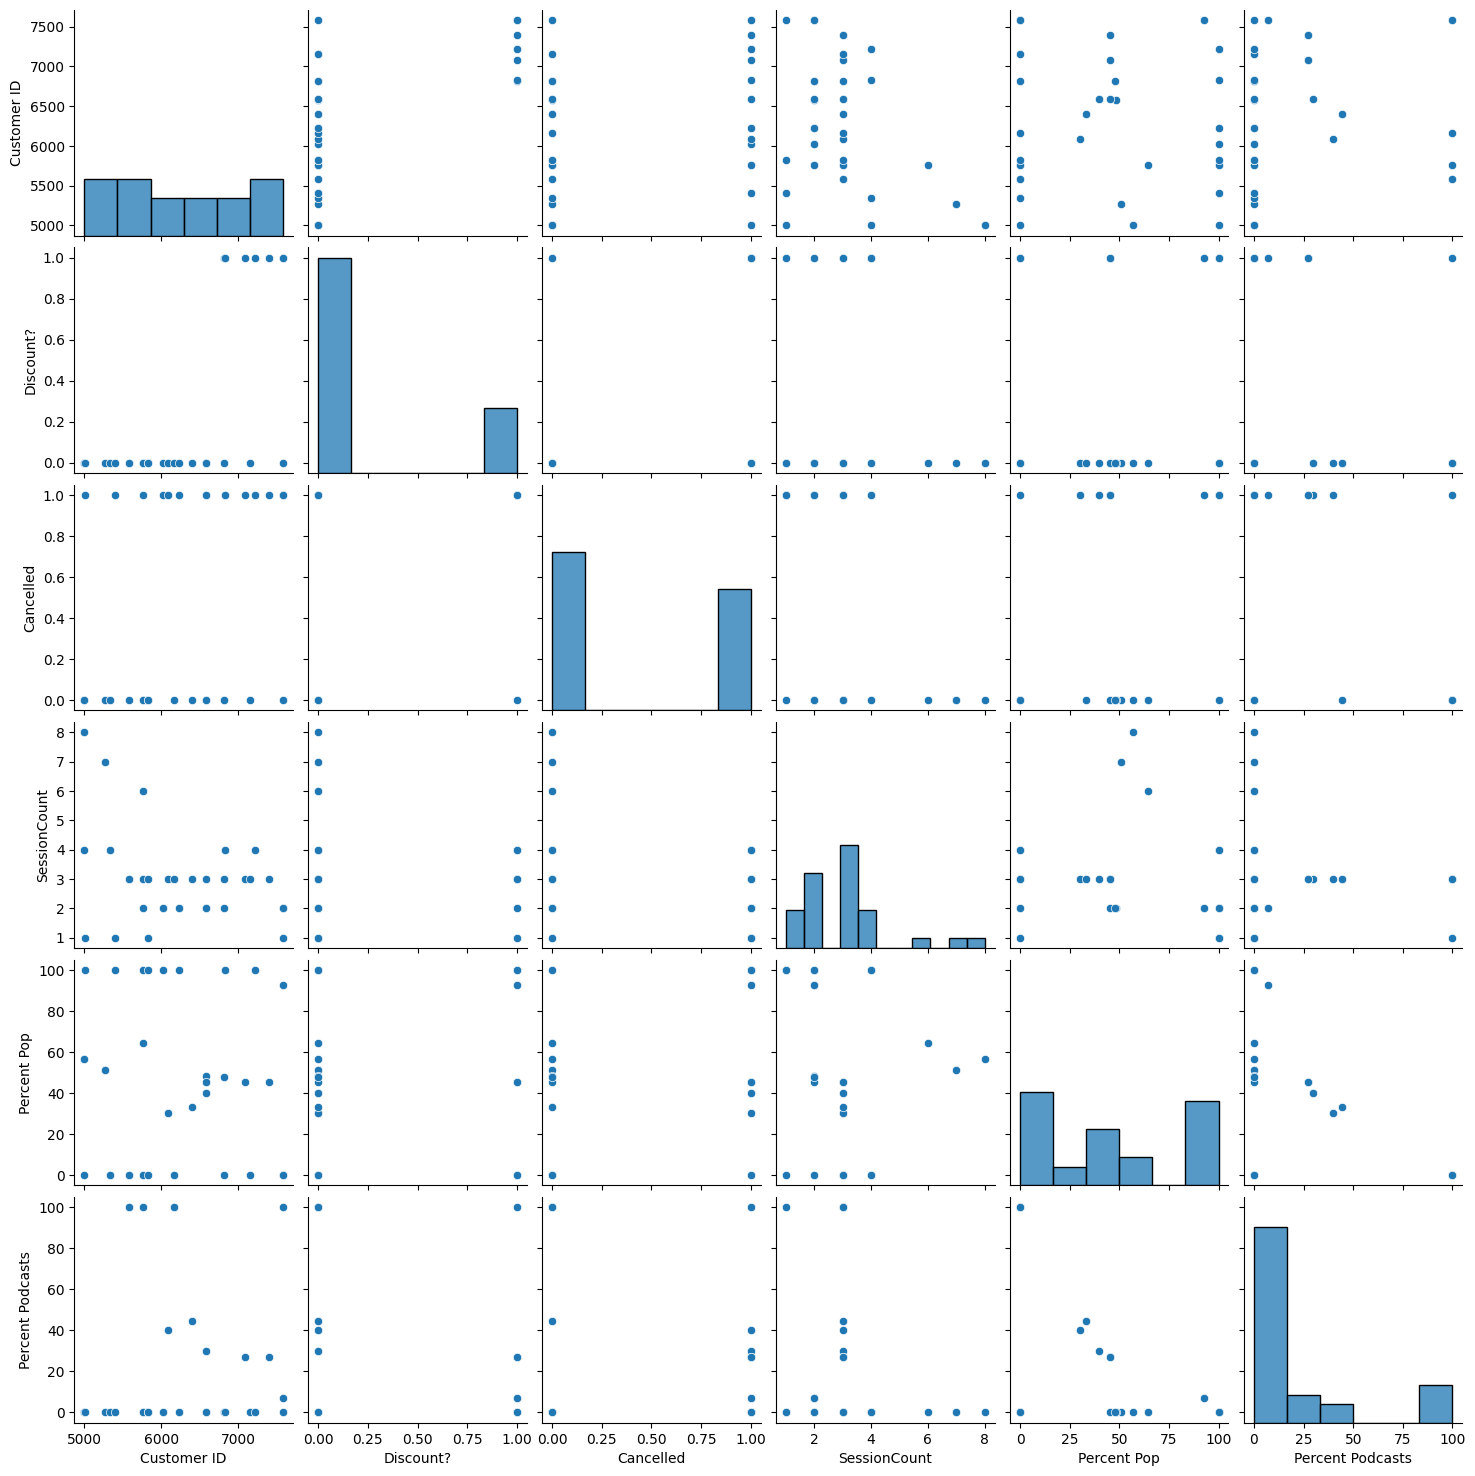

In [401]:
sns.pairplot(df_model)

In [437]:
df_model.corr()

,Customer ID,Discount?,Cancelled,SessionCount,Percent Pop,Percent Podcasts
Customer ID,1.000000,0.648514,0.269942,-0.337083,-0.076129,0.083083
Discount?,0.648514,1.000000,0.471825,-0.048877,0.112675,0.062938
Cancelled,0.269942,0.471825,1.000000,-0.333739,0.585630,-0.035414
SessionCount,-0.337083,-0.048877,-0.333739,1.000000,-0.131156,-0.125459
Percent Pop,-0.076129,0.112675,0.585630,-0.131156,1.000000,-0.487193
Percent Podcasts,0.083083,0.062938,-0.035414,-0.125459,-0.487193,1.000000


- A discount is correlated with a cancellation
- Customers who cancelled listened to Pop songs
- Negative correlation between the number of sessions and a cancellation. More listening sessions == Less cancellations
- Podcast listening unrelated to any other variable